In [26]:
import numpy as np
import HandShapeAnalysis, h5py
import matplotlib.pyplot as plt
import pptk
import cv2 as cv
import matplotlib
from importlib import reload
import deproject

In [2]:
h5f = h5py.File("../recording_data/2_tap.hdf5", 'r')
pcl_center = h5f['pcl_center'][...]
trans_matrix = h5f['trans_matrix'][...]
depth_frame= h5f['depth']
color_frame= h5f['color']

In [3]:
reload(HandShapeAnalysis)
analyser2 = HandShapeAnalysis.Depth2Finger(pcl_center, trans_matrix)
analyser2.set_show(debug=False,
               finger_point_image=True, hull_image=True, detected_defect=True, cluster_point=True, possibility_modal=False)
analyser2.set_cloud_min(0.02)
analyser2.RANSAC = True

In [4]:
areas,points = analyser2.renew_high(depth_frame[13], True)

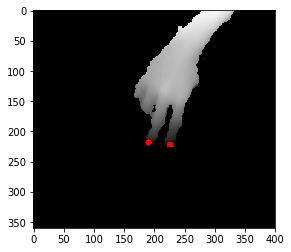

In [5]:
plt.imshow(analyser2.finger_point_image)

In [6]:
areas,points = analyser2.renew_depth(depth_frame[13], True)

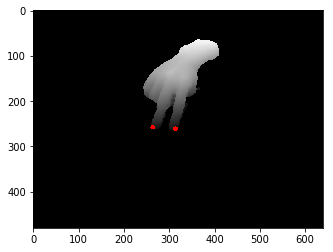

In [7]:
plt.imshow(analyser2.finger_point_image)

In [8]:
new_method_area, _ = analyser2.renew_both(depth_frame[13])

In [9]:
analyser2.cloud.shape

(480, 640, 3)

In [10]:
def select_RGB(cloud, coloring):
    cloud = cloud.reshape(-1,3)
    bool_should_color = np.full(cloud.shape, False)
    for p in coloring:
        bool_should_color = bool_should_color | (cloud == p)
    bool_should_color = bool_should_color[:,0]&bool_should_color[:,1]&bool_should_color[:,2]
    RGB = np.full(cloud.shape, 255)
    RGB[bool_should_color] = np.array([255,0,0])
    return RGB
    

In [11]:
RGB = select_RGB(analyser2.cloud.reshape(-1,3), np.concatenate((new_method_area[0],new_method_area[1])))

In [12]:
pptk.viewer(analyser2.cloud.reshape(-1,3),RGB)

In [115]:
analyser2.RANSAC = False
old_method_area, _ = analyser2.renew_both(depth_frame[13])

In [116]:
RGB = select_RGB(analyser2.cloud.reshape(-1,3), np.concatenate((old_method_area[0],old_method_area[1])))

In [117]:
pptk.viewer(analyser2.cloud.reshape(-1,3),RGB)

In [23]:
np.sum(trans_matrix[:,0]* analyser2.cloud[0,0,0])

0.024075521

In [63]:
trans_matrix

array([[-0.99992555, -0.01181953,  0.00303853],
       [-0.00801172,  0.6233078 , -0.7819356 ],
       [ 0.00836591, -0.7813823 , -0.62399656]], dtype=float32)

In [44]:
analyser2.cloud[0,:5].T

array([[-0.02408585, -0.02408585, -0.02408585, -0.02408585, -0.02408585],
       [ 0.28076035,  0.28076035,  0.28076035,  0.28076035,  0.28076035],
       [ 0.23147687,  0.23147687,  0.23147687,  0.23147687,  0.23147687]],
      dtype=float32)

In [39]:
np.dot(trans_matrix,  analyser2.cloud[0,:1].T)

array([[ 0.02146895],
       [-0.00580691],
       [-0.36402345]], dtype=float32)

In [29]:
pptk.viewer()

In [30]:
c = deproject.compute(depth_frame[13].astype(np.short()))

In [106]:
test = np.array([[1,0,0],trans_matrix[1],trans_matrix[2]])

In [107]:
np.dot(test, c.reshape(-1,3).T).T

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [108]:
np.dot(test, c.reshape(-1,3)[5].T).T

array([0., 0., 0.])

In [110]:
pptk.viewer(np.dot(test, c.reshape(-1,3).T).T)

In [89]:
pptk.viewer(c)